
### Model 1
Team member names:  Ye Shi, Shiqi Zhang

### To do:  
1. Specify the model number above and indicate the team member names.
- Specify your model structure below. 
- Restart kernel and run all.
- Answer the questions in the next text box.
- Print to pdf.
- Combine the pdfs for the 3 models into a single pdf.
- Submit on gradescope.  


### Questions:  
Give brief (one or two sentence) answers to the questions below.

Q1: What are the pros and cons of this model? 

Answer: It trains fast, but there is no accuracy.

Q2:  What do you think would be an efficient way to improve accuracy for this model and why?  This is not so much about being right or wrong as about making an informed hypothesis in response to an experiment. 

Answer: Add an useful activation function would work.



In [12]:
import keras
keras.__version__

'2.2.4'

### Model specification

Define the structure of your model and display it in the next section of code.

In [13]:
from keras import layers
from keras import models

# Model definition
model = models.Sequential()

# Replace with your model:
model.add(layers.Conv2D(64, (5, 5), activation=layers.LeakyReLU(alpha = 0.5), padding = 'same', input_shape=(32, 32, 3),kernel_initializer='glorot_normal'))
model.add(layers.Conv2D(64, (3, 3), activation=layers.LeakyReLU(alpha = 0.5), padding = 'same',kernel_initializer='glorot_normal'))
model.add(layers.Flatten())
model.add(layers.Dense(10,kernel_initializer='glorot_normal'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                655370    
Total params: 697,162
Trainable params: 697,162
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


### Prepare the data.  
You don't need to change this section.  

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Compile the model and test before training.   
You don't need to change this section.  

In [15]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Untrained accuracty = ' + str(test_acc))


10000/10000 [==============================] - 2s 228us/step
Untrained accuracty = 0.0878


### Train the model.  
You don't need to change this section.    

In [16]:

num_epochs = 10
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=num_epochs, batch_size=64)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 14s 301us/step - loss: 9.6063 - acc: 0.1005 - val_loss: 9.6644 - val_acc: 0.0950
Epoch 2/10
45000/45000 [==============================] - 13s 288us/step - loss: 9.6716 - acc: 0.1006 - val_loss: 9.6644 - val_acc: 0.0950
Epoch 3/10
45000/45000 [==============================] - 13s 289us/step - loss: 9.6716 - acc: 0.1006 - val_loss: 9.6644 - val_acc: 0.0950
Epoch 4/10
45000/45000 [==============================] - 13s 290us/step - loss: 9.6716 - acc: 0.1006 - val_loss: 9.6644 - val_acc: 0.0950
Epoch 5/10
45000/45000 [==============================] - 13s 289us/step - loss: 9.6716 - acc: 0.1006 - val_loss: 9.6644 - val_acc: 0.0950
Epoch 6/10
45000/45000 [==============================] - 13s 290us/step - loss: 9.6716 - acc: 0.1006 - val_loss: 9.6644 - val_acc: 0.0950
Epoch 7/10
45000/45000 [==============================] - 13s 290us/step - loss: 9.6716 - acc: 0.1006 - val_loss: 9.6

### Plot the loss and accuracy as a function of epoch. 
You don't need to change this section.  

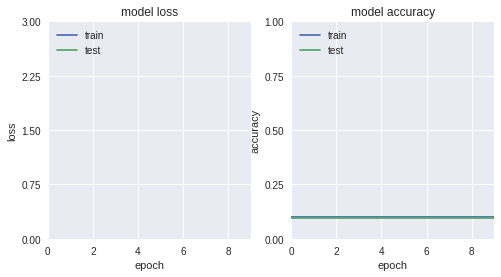

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training(history):
  ncols = 2
  keywords = ['loss', 'acc']
  names = ['loss', 'accuracy']
  fig, axs = plt.subplots(nrows=1, ncols=ncols, figsize=(8, 4))
 
  for ax, ind, keyword, name in zip(axs.flat, range(ncols), keywords, names):
    ylim = [3, 1][ind]
    data = history.history[keyword]
    ax.plot(data)
    ax.plot(history.history['val_' + keyword])
    ax.set_title('model ' + name)
    ax.set_xlabel('epoch')
    ax.set_ylabel(name)
    ax.set_xlim([0, len(data)-1])
    ax.set_ylim([0, ylim])
    ax.set_xticks(range(0, len(data), 2))
    ax.set_yticks(np.linspace(0, ylim, 5))
    ax.legend(['train', 'test'], loc='upper left')
    
  plt.show()
 
 
plot_training(history)

### Evaluate the trained model on the test data.

You don't need to change this section.  

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy on test images is ' + str(test_acc))

10000/10000 [==============================] - 1s 141us/step
Accuracy on test images is 0.1
